# Doppler (from NASA)

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy

import time

debugFlag = True

# Doppler

In [2]:
def dopplerShift(freqMHz, data, speed, angle):
    # fd = (V*cos(a) * f0) / c
    c = 3 * pow(10, 8)
    freqHz = freqMHz * pow(10, 6)
    speedMS = speed * 1000 / 3600
    print("Km/h = ",speed,"  ", "m/s = ", speedMS)
    dopplerFrequency = (speedMS * np.cos(angle) * freqHz) / c
    print(dopplerFrequency)
    shiftedData = 0
    return shiftedData

In [11]:
def dPrint(*argc):
    if (debugFlag == True):
        print(' '.join(map(str, argc)))
        
def aPrint(array):
    for i in array:
        print(i)
        
def checkArrays(arr1, arr2):
    if (arr1 == arr2):
        return True
    else:
        return False

# Modulator

In [87]:
def encodeQPSK(bitArray):
    if ( len(bitArray)%2 == 0 ):
        evenFlag = True
    else:
        bitArray.append(0)
        evenFlag = True
    dPrint("Even numer of bits: ",evenFlag)
    dPrint("Bit array: ", bitArray)
    complexArray = []
    count = 0
    while(1):
        real = ( 1/math.sqrt(2) ) * (1 - 2 * bitArray[count])
        imag = ( 1/math.sqrt(2) ) * (1 - 2 * bitArray[count + 1])
        complexArray.append(complex(real, imag))
        count += 2
        if(count == len(bitArray)):
            break
    return complexArray

def decodeQPSK(complexArray):
    bitArray = []
    for i in range(len(complexArray)):
        if(complexArray[i].real >= 0 and complexArray[i].imag >= 0):
            bitArray.append(0)
            bitArray.append(0)
        elif ( complexArray[i].real >= 0 and complexArray[i].imag < 0 ):
            bitArray.append(0)
            bitArray.append(1)
        elif ( complexArray[i].real < 0 and complexArray[i].imag < 0 ):
            bitArray.append(1)
            bitArray.append(1)
        elif ( complexArray[i].real <= 0 and complexArray[i].imag > 0 ):
            bitArray.append(1)
            bitArray.append(0)
    return bitArray

# My FFT/IFFT

In [130]:
roundValue = 16
start = 0
def myDFFT(inputData):
    outputData = []
    N = len(inputData)
    for i in range(start, N + start):
        localSumm = complex(0, 0)
        real = 0
        imag = 0
        for j in range(start, N + start):
            arg = 2 * math.pi * j * i / N
            #real += inputData[j-start].real * math.cos(arg)
            #imag += inputData[j-start].imag * math.sin(arg)
            localSumm += inputData[j] * complex(math.cos(arg), math.sin(arg))
        outputData.append(localSumm)
        #outputData.append( complex(real, (-1) * imag) )
    return outputData

def myIDFFT(inputData):
    outputData = []
    N = len(inputData)
    for i in range(start, N + start):
        localSumm = complex(0, 0)
        real = 0
        imag = 0
        for j in range(start, N + start):
            arg = 2 * math.pi * j * i / N
            #real += inputData[j-start].real * math.cos(arg)
            #imag += inputData[j-start].imag * math.sin(arg)
            localSumm += ( inputData[j] * complex(math.cos(arg), math.sin(arg)) / N )
        #print("localSumm: ", localSumm)
        outputData.append(localSumm)
        #outputData.append( math.sqrt( real*real + imag*imag ) / len(inputData) )
        #outputData.append( complex(real/len(inputData), imag/len(inputData)) )
        #outputData.append(complex(real, imag))
    return outputData

# Testing

In [131]:
centerFreq = 2600 # GHz
bandwidth = 30 # kHz
numerology = 15 # kHz
nSubcarriers = round( (bandwidth * 1000) / numerology )
dataString = [0,1,1,1,0,0,0,1,0,1,1,0,1,0,1,0,1,1,1,0,1]
#dataString = [random.randint(0,1) for i in range(1000)]
nSymbolsInSlot = 7

print("Modulated Data: ")
modulatedData = encodeQPSK(dataString)
aPrint(modulatedData)

# Numpy FFT
print("numpy ifft: ")
ifftData = np.fft.ifft(modulatedData)
print(ifftData)
print("numpy fft: ")
fftData = np.fft.fft(ifftData)
print(fftData)
demodulatedData = decodeQPSK(fftData)
checkArrays(dataString, demodulatedData)

# My FFT
print("My IFFT: ")
myIFFT = myIDFFT(modulatedData)
aPrint(myIFFT)
print("My FFT: ")
myFFT = myDFFT(myIFFT)
aPrint(myFFT)

Modulated Data: 
Even numer of bits:  True
Bit array:  [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0]
(0.7071067811865475-0.7071067811865475j)
(-0.7071067811865475-0.7071067811865475j)
(0.7071067811865475+0.7071067811865475j)
(0.7071067811865475-0.7071067811865475j)
(0.7071067811865475-0.7071067811865475j)
(-0.7071067811865475+0.7071067811865475j)
(-0.7071067811865475+0.7071067811865475j)
(-0.7071067811865475+0.7071067811865475j)
(-0.7071067811865475-0.7071067811865475j)
(-0.7071067811865475+0.7071067811865475j)
(-0.7071067811865475+0.7071067811865475j)
numpy ifft: 
[-0.1928473 +0.06428243j  0.24615413+0.22543077j -0.10759054+0.01672389j
  0.36353489-0.4088996j   0.2284505 -0.15885494j  0.1252104 +0.02047732j
  0.28666202+0.1990599j  -0.03831701-0.11579906j -0.02999247-0.24157917j
 -0.08697145+0.14935255j -0.08718639-0.45730089j]
numpy fft: 
[ 0.70710678-0.70710678j -0.70710678-0.70710678j  0.70710678+0.70710678j
  0.70710678-0.70710678j  0.70710678-0.70710678j -0.7

# Plots

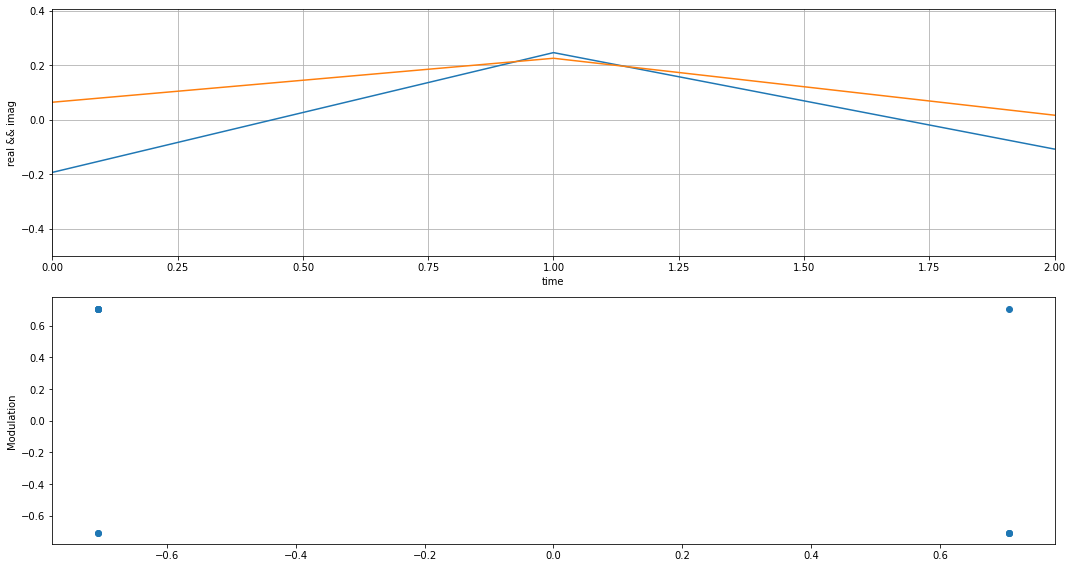

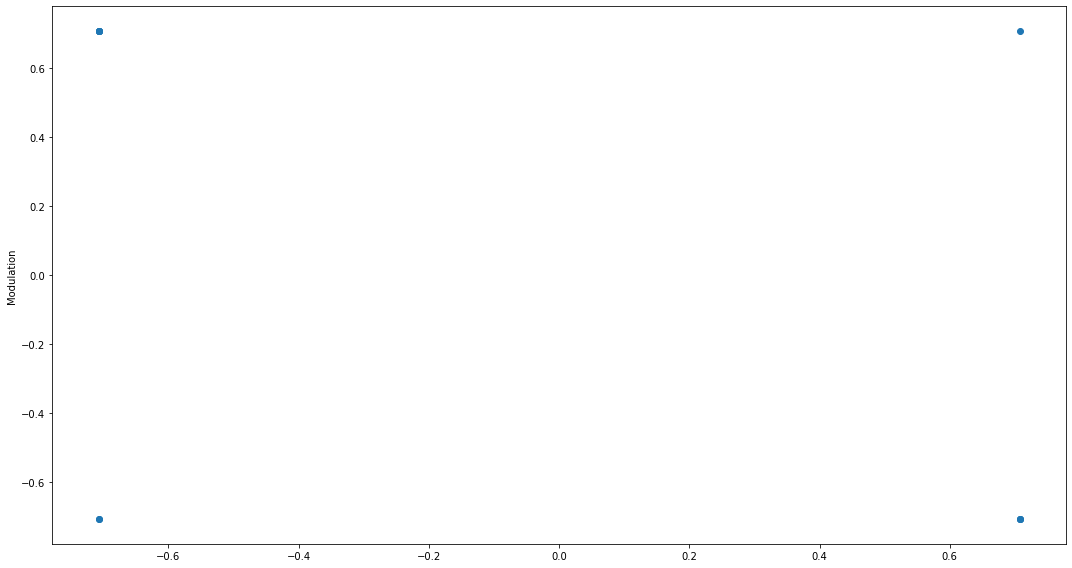

0

In [131]:
import matplotlib.pyplot as plt

def showSignal(inputTime, inputFreq):
    real = []
    imag = []
    for i in range(len(inputTime)):
        real.append(inputTime[i].real)
        imag.append(inputTime[i].imag)
    t = np.arange(len(inputTime))
    fig, axs = plt.subplots(2, 1, figsize=(15, 8))
    axs[0].plot(t, real, t, imag)
    axs[0].set_xlim(0, 2)
    axs[0].set_xlabel('time')
    axs[0].set_ylabel('real && imag')
    axs[0].grid(True)

    realFreq = []
    imagFreq = []
    for i in range(len(inputFreq)):
        realFreq.append(inputFreq[i].real)
        imagFreq.append(inputFreq[i].imag)
    #cxy, f = 
    axs[1].scatter(realFreq, imagFreq)
    axs[1].set_ylabel('Modulation')

    fig.tight_layout()
    plt.show()
    return 0

def showScatter(inputFreq):
    realFreq = []
    imagFreq = []
    for i in range(len(inputFreq)):
        realFreq.append(inputFreq[i].real)
        imagFreq.append(inputFreq[i].imag)
    #cxy, f = 
    fig, axs = plt.subplots(1, 1, figsize=(15, 8))
    axs.scatter(realFreq, imagFreq)
    axs.set_ylabel('Modulation')

    fig.tight_layout()
    plt.show()
    return 0

showSignal(ifftData, modulatedData)
showScatter(modulatedData)

# FFT functions from NumPy sourcecode

In [ ]:
def fft(a, n=None, axis=-1, norm=None):
    """
    Examples
    --------
    >>> np.fft.fft(np.exp(2j * np.pi * np.arange(8) / 8))
    array([-2.33486982e-16+1.14423775e-17j,  8.00000000e+00-1.25557246e-15j,
            2.33486982e-16+2.33486982e-16j,  0.00000000e+00+1.22464680e-16j,
           -1.14423775e-17+2.33486982e-16j,  0.00000000e+00+5.20784380e-16j,
            1.14423775e-17+1.14423775e-17j,  0.00000000e+00+1.22464680e-16j])
    In this example, real input has an FFT which is Hermitian, i.e., symmetric
    in the real part and anti-symmetric in the imaginary part, as described in
    the `numpy.fft` documentation:
    >>> import matplotlib.pyplot as plt
    >>> t = np.arange(256)
    >>> sp = np.fft.fft(np.sin(t))
    >>> freq = np.fft.fftfreq(t.shape[-1])
    >>> plt.plot(freq, sp.real, freq, sp.imag)
    [<matplotlib.lines.Line2D object at 0x...>, <matplotlib.lines.Line2D object at 0x...>]
    >>> plt.show()
    """
    a = asarray(a)
    if n is None:
        n = a.shape[axis]
    inv_norm = _get_forward_norm(n, norm)
    output = _raw_fft(a, n, axis, False, True, inv_norm)
    return output

def ifft(a, n=None, axis=-1, norm=None):
    """
    Examples
    --------
    >>> np.fft.ifft([0, 4, 0, 0])
    array([ 1.+0.j,  0.+1.j, -1.+0.j,  0.-1.j]) # may vary
    Create and plot a band-limited signal with random phases:
    >>> import matplotlib.pyplot as plt
    >>> t = np.arange(400)
    >>> n = np.zeros((400,), dtype=complex)
    >>> n[40:60] = np.exp(1j*np.random.uniform(0, 2*np.pi, (20,)))
    >>> s = np.fft.ifft(n)
    >>> plt.plot(t, s.real, label='real')
    [<matplotlib.lines.Line2D object at ...>]
    >>> plt.plot(t, s.imag, '--', label='imaginary')
    [<matplotlib.lines.Line2D object at ...>]
    >>> plt.legend()
    <matplotlib.legend.Legend object at ...>
    >>> plt.show()
    """
    a = asarray(a)
    if n is None:
        n = a.shape[axis]
    inv_norm = _get_backward_norm(n, norm)
    output = _raw_fft(a, n, axis, False, False, inv_norm)
    return output

def _get_forward_norm(n, norm):
    if n < 1:
        raise ValueError(f"Invalid number of FFT data points ({n}) specified.")

    if norm is None or norm == "backward":
        return 1
    elif norm == "ortho":
        return sqrt(n)
    elif norm == "forward":
        return n
    raise ValueError(f'Invalid norm value {norm}; should be "backward",'
                     '"ortho" or "forward".')
    
def _get_backward_norm(n, norm):
    if n < 1:
        raise ValueError(f"Invalid number of FFT data points ({n}) specified.")

    if norm is None or norm == "backward":
        return n
    elif norm == "ortho":
        return sqrt(n)
    elif norm == "forward":
        return 1
    raise ValueError(f'Invalid norm value {norm}; should be "backward", '
                     '"ortho" or "forward".')
    
def _raw_fft(a, n, axis, is_real, is_forward, inv_norm):
    axis = normalize_axis_index(axis, a.ndim)
    if n is None:
        n = a.shape[axis]

    fct = 1/inv_norm

    if a.shape[axis] != n:
        s = list(a.shape)
        index = [slice(None)]*len(s)
        if s[axis] > n:
            index[axis] = slice(0, n)
            a = a[tuple(index)]
        else:
            index[axis] = slice(0, s[axis])
            s[axis] = n
            z = zeros(s, a.dtype.char)
            z[tuple(index)] = a
            a = z

    if axis == a.ndim-1:
        r = pfi.execute(a, is_real, is_forward, fct)
    else:
        a = swapaxes(a, axis, -1)
        r = pfi.execute(a, is_real, is_forward, fct)
        r = swapaxes(r, axis, -1)
    return r

# Install Packages

In [6]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install bokeh

     |████████████████████████████████| 10.7MB 6.8MB/s eta 0:00:01
     |████████████████████████████████| 645kB 11.1MB/s eta 0:00:01
     |████████████████████████████████| 40kB 10.6MB/s eta 0:00:01
  Stored in directory: /home/ruslan/snap/jupyter/6/.cache/pip/wheels/29/25/bd/ece99a9f4f1fdc59da3a94d1cd3e220c1c32624f19e4c19969
Successfully built bokeh
